In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import wilcoxon, shapiro
from scipy.stats import skew, kurtosis

1. Učitavanje i čiščenje podataka

In [7]:
#1 ucitavanje podataka
df = pd.read_csv("hormon.csv", sep=';',decimal=",")


Unutar csv-a se točka-zarez zamjenjuje sa zarezima

In [8]:
#2 pregled i ciscenje
print("Head:\n",df.head(),"\n")
print("Info:")
print(df.info())
print("\nBroj null vrijednosti:\n",df.isnull().sum(),"\n")

Head:
   spol  gastrS  somatS  somatZ  pusenje  alkohol  kava  CLOtest dijagnoza,,,
0    z    92.3     3.1   29.31        1        0     1        1            G
1    z    49.5     8.5    5.52        0        0     1        1            G
2    z    40.5    16.2   15.22        1        0     1        0            G
3    z    42.7    16.0    3.67        0        0     1        0           G,
4    z    48.2    16.0   66.97        1        0     1        0           G, 

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   spol          82 non-null     object 
 1   gastrS        78 non-null     float64
 2   somatS        77 non-null     float64
 3   somatZ        81 non-null     float64
 4   pusenje       82 non-null     int64  
 5   alkohol       82 non-null     int64  
 6   kava          82 non-null     int64  
 7   CLOtest       82 non-null    

In [11]:
#3 obrada nedostajucih vrijednosti
data=df
data=data.dropna()
print(data.info(),"\n")
print("\nBroj null vrijednosti:\n",data.isnull().sum(),"\n")

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 0 to 81
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   spol          76 non-null     object 
 1   gastrS        76 non-null     float64
 2   somatS        76 non-null     float64
 3   somatZ        76 non-null     float64
 4   pusenje       76 non-null     int64  
 5   alkohol       76 non-null     int64  
 6   kava          76 non-null     int64  
 7   CLOtest       76 non-null     int64  
 8   dijagnoza,,,  76 non-null     object 
dtypes: float64(3), int64(4), object(2)
memory usage: 5.9+ KB
None 


Broj null vrijednosti:
 spol            0
gastrS          0
somatS          0
somatZ          0
pusenje         0
alkohol         0
kava            0
CLOtest         0
dijagnoza,,,    0
dtype: int64 



In [12]:
#4 velicina uzorka nakon ciscenja
print("Velicina uzorka: ",len(data))

Velicina uzorka:  76


2. Eksplorativna i Deskriptivna statistika

In [13]:
#1 Deskriptivna statistika (univarijantna analiza)
print(f"",data["gastrS"].describe())
print(f"\nMedijan:",data["gastrS"].median())
print("\nMode:", data["gastrS"].mode()[0]) #mode kada koristim panda

#mode sa scipy
#from scipy.stats import mode
#print("\n scypy mode: ",mode(data["gastrS"]))

#mjere disperzije
#standardna devijacija
print("\nStandardna devijacija:",data["gastrS"].std())
#raspon
print("\nRaspon:",data["gastrS"].max()-data["gastrS"].min())

#mjere sredisnje tendencije - opisuju tipicnu vrijednost varijable
#mean - aritmeticka sredina => prosjek svih vrijednosti
#medijan - srednja vrijednost kada se podaci poslože od najmanje do najveće, tj polovica elemenata ima vrijednost manju od medijana, a polovica vecu od medijana
#mod/mode - najcesca/najfrekventnija vrijednost

#mjere disperzije
#std devijacija - Pokazuje koliko se vrijednosti tipično udaljavaju od prosjeka, veca std veca varijabilnost
#raspon (range) - razlika min i max vrijednosti

 count     76.000000
mean      52.656711
std       17.949472
min       16.230000
25%       41.820000
50%       48.550000
75%       59.045000
max      140.300000
Name: gastrS, dtype: float64

Medijan: 48.55

Mode: 36.3

Standardna devijacija: 17.949472147347983

Raspon: 124.07000000000001


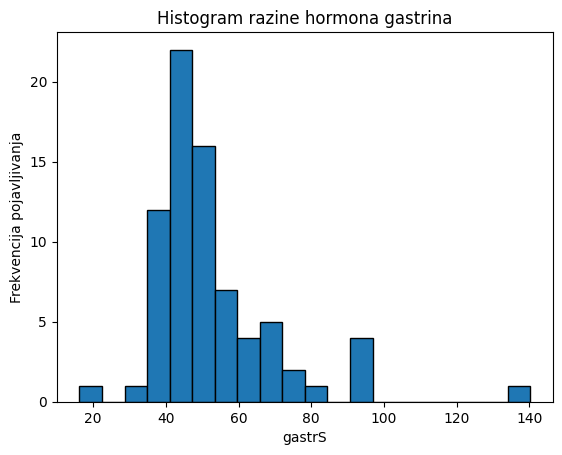


Skewness: 2.0968413857597774

Kurtosis: 6.643554874572169


In [16]:
#2 analiza distribucije varijable gastrS

from scipy.stats import skew, kurtosis

gastrS=data["gastrS"]
#histogram
plt.hist(gastrS, bins=20, edgecolor='black')
plt.xlabel("gastrS")
plt.ylabel("Frekvencija pojavljivanja")
plt.title("Histogram razine hormona gastrina")
plt.show()

#Skewness (asimetrija)
print(f"\nSkewness: {skew(gastrS)}")
#≈ 0 → simetrična distribucija
#> 0 → rep na desnoj strani (pozitivna asimetrija) => naginje se u lijevo
#< 0 → rep na lijevoj strani (negativna asimetrija) => naginje se u desno
#> 1 ili < -1 → jaka asimetrija


#Kurtosis (šiljatost)
print(f"\nKurtosis: {kurtosis(gastrS)}")
#≈ 0 → normalna distribucija
#> 0 → “šiljatija”, više outliera
#< 0 → “plosnatija”, manje outliera

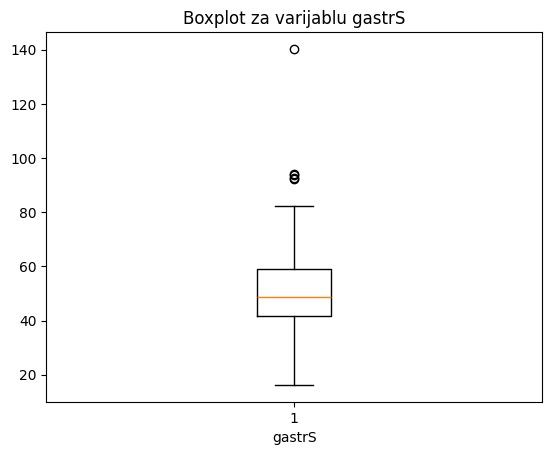

In [18]:
plt.figure()
plt.boxplot(x=data['gastrS'])
plt.title(f"Boxplot za varijablu gastrS")
plt.xlabel("gastrS")
plt.show()

3. Izvršavanje zadatka statistike zaključivanja

In [25]:
#1 provjera normalnosti (Shapiro-Wilk test)

#H0 (nulta hipoteza) - podaci su normalno distribuirani (ovu provjeravamo)
#H1 () - podaci nisu normalno distribuirani
# p > 0.05 → NE odbacujemo H0 → distribucija je normalna => t-test
# p < 0.05 → odbacujemo H0 → distribucija NIJE normalna => Mann-Whitney U test

from scipy.stats import shapiro

stat, p = shapiro(data["gastrS"])
print("Shapiro-Wilk statistika:", stat)
print("p-vrijednost:", p)

#p<0.05 => odbacujemo H0 => distribucija NIJE normalna
#zaključujemo da postoji statistički značajna razlika u razini hormona
#gastrina između muškaraca i žena

Shapiro-Wilk statistika: 0.8077082567725451
p-vrijednost: 1.4677000016064132e-08


In [29]:
#2 Intervalna procjena (95% interval povjerenja (CI) za srednju vrijednost varijable)
# t‑test je standardni test za razliku sredina dviju nezavisnih grupa.

#a) distribucija NIJE normalna ili je n mali => koristi se t-distribucija za izračun intervala povjerenja

import numpy as np
from scipy.stats import t

x = data["gastrS"]
n = len(x)
mean = np.mean(x)
sd = np.std(x, ddof=1)

# t kritična vrijednost
t_crit = t.ppf(0.975, df=n-1)
# standardna pogreška
se = sd / np.sqrt(n)
# interval
lower = mean - t_crit * se
upper = mean + t_crit * se

print("95% CI za srednju vrijednost gastrS:", (lower, upper))

#Budući da distribucija varijable gastrS prema Shapiro–Wilk testu
#odstupa od normalne, ali je veličina uzorka relativno velika (n = 76)
#i populacijska standardna devijacija nije poznata, za izračun 95% intervala
#povjerenja za srednju vrijednost koristi se t‑distribucija

95% CI za srednju vrijednost gastrS: (np.float64(48.55508043680401), np.float64(56.758340615827585))


ILI MOŽE I OVAKO KAO NA SJEDEĆEM KODU

In [36]:
#t - statistka
from scipy import stats
confidence_level = 0.95
lower_bound, upper_bound = stats.t.interval(confidence_level, 76 - 1, loc=np.mean(data['gastrS']), scale=stats.sem(data['gastrS']))
print(f"95% interval povjerenja za gastrS (neparametarski): [{lower_bound:.2f}, {upper_bound:.2f}]")

95% interval povjerenja za gastrS (neparametarski): [48.56, 56.76]


In [30]:
#2 b) testiranje postoji li znacajna razlika u razini hormona gastrina
#s obzirom na spol sudionika

# koristi se t-test jer je uzorak velik (n=76), pa je t-test robustan iako podaci nisu normalni

male = data[data["spol"] == "m"]["gastrS"]
female = data[data["spol"] == "z"]["gastrS"]
# t-test za nezavisne uzorke
#from scipy.stats import ttest_ind
#stat, p = ttest_ind(male, female, equal_var=False)
#print("t-test statistika:", stat)
#print("p-vrijednost:", p) #=0.59

#Mann Whitney U test
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(male, female, alternative="two-sided")
print("Mann-Whitney U statistika:", stat)
print("p-vrijednost:", p)

# H0 => nema znacajne razlike u razini hormona gastrina između m i ž
# H1 => postoji znacajna razlika u razini hormona gastrina između m i ž
# p=0.85 > 0.05 => H0 se NE odbacuje => Nema znacajne razlike u razini gastrina između m i ž


Mann-Whitney U statistika: 740.5
p-vrijednost: 0.8475331169356278


In [31]:
# 2.c) Testiranje postoji li značajna razlika u razini hormona gastrina
# s obzirom na PUŠENJE (pušači vs. nepušači)

# Koristi se Mann-Whitney U test jer:
# 1) uspoređuju se dvije nezavisne skupine
# 2) varijabla gastrS NIJE normalno distribuirana (Shapiro-Wilk p < 0.05)
# 3) Mann-Whitney je neparametrijski test i ne zahtijeva normalnost

from scipy.stats import mannwhitneyu

# podijeliti uzorak na pusace i nepusace
pusaci = data[data["pusenje"] == 1]["gastrS"]
nepusaci = data[data["pusenje"] == 0]["gastrS"]

# Mann-Whitney U test (dvostrani)
stat, p = mannwhitneyu(pusaci, nepusaci, alternative="two-sided")

print("Mann-Whitney U statistika:", stat)
print("p-vrijednost:", p)

# H0: distribucije razine hormona gastrina su jednake kod pušača i nepušača
# H1: distribucije se razlikuju (postoji razlika u razini gastrina)

# Ako je p < 0.05 → odbacujemo H0 → postoji značajna razlika
# Ako je p > 0.05 → NE odbacujemo H0 → nema značajne razlike

Mann-Whitney U statistika: 754.0
p-vrijednost: 0.7394590172206548


In [33]:
# 1) Normalnost distribucije
# Shapiro–Wilk test pokazao je p < 0.05, što znači da varijabla gastrS
# NIJE normalno distribuirana. Distribucija je asimetrična i ima odstupanja
# od normalnog oblika, što opravdava korištenje neparametrijskih testova
# za usporedbu skupina.

# 2) Intervalna procjena srednje vrijednosti
# Unatoč nenormalnoj distribuciji, veličina uzorka je velika (n = 76),
# pa je t-distribucija prikladna za izračun 95% intervala povjerenja.
# Dobiveni 95% CI pokazuje raspon u kojem se s 95% pouzdanosti nalazi
# stvarna srednja vrijednost hormona gastrina u populaciji.

# 3) Razlika prema spolu (M vs. Ž)
# Budući da distribucija nije normalna, korišten je Mann–Whitney U test.
# Rezultat: p > 0.05 → NE odbacujemo H0.
# Zaključak: Nema statistički značajne razlike u razini hormona gastrina
# između muškaraca i žena.

# 4) Razlika prema pušenju (pušači vs. nepušači)
# Također je korišten Mann–Whitney U test jer su skupine nezavisne,
# a podaci nenormalni. # Rezultat: p > 0.05 → NE odbacujemo H0.
# Zaključak: Nema statistički značajne razlike u razini hormona gastrina
# između pušača i nepušača.